In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/df18to21_cleanedH.csv')
census = pd.read_csv('../data/census_20.csv')

In [3]:
df.columns

Index(['sentence_length', 'year_sentenced', 'sentence_type', 'guideline_range',
       'imprisoned', 'guideline_var_pct', 'dependents', 'count_convictons',
       'race', 'disposition', 'citizen', 'state', 'criminal_hist', 'drug_type',
       'case_type', 'age', 'weapon', 'presentence_stat', 'gender',
       'crime_type', 'region', 'college', 'white'],
      dtype='object')

## Pie Chart (percentage of highest crimes)

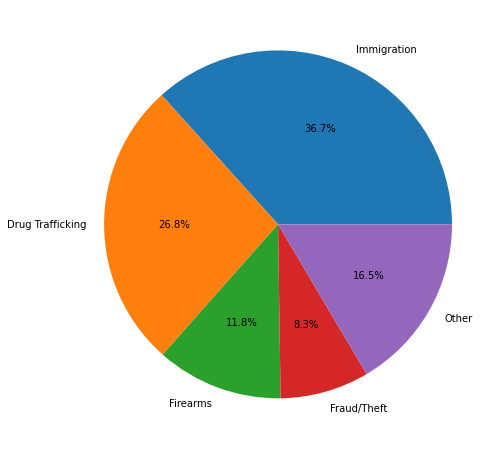

In [4]:
crime_df = pd.DataFrame(df['crime_type'].value_counts(normalize=True).head(4)) #, columns=['crime_type'])
crime_df.reset_index(inplace=True)
crime_df.loc[len(crime_df.index)] = [0, (1-crime_df['crime_type'].sum())]
crime_df['index'] = ['Immigration', 'Drug Trafficking', 'Firearms', 'Fraud/Theft', 'Other']
crime_df.columns = ['crime_type', 'percentage']

plt.figure(figsize=(8, 8))
plt.pie(crime_df['percentage'], labels=crime_df['crime_type'], autopct='%1.1f%%',);

Immigration makes up 36.7% of the crimes

## Sentence Length

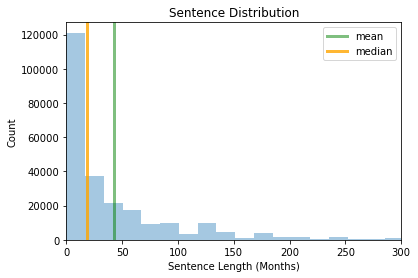

In [5]:
#referenced https://gist.github.com/cereniyim/df1c8646411cc34eb9720a79400a200f
# set the plot size
#plt.figure(figsize(12,10))

# set the histogram, mean and median
sns.distplot(df["sentence_length"], kde=False)
plt.axvline(x=df.sentence_length.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df.sentence_length.median(), linewidth=3, color='orange', label="median", alpha=0.8)

# set title, legends and labels
plt.xlabel("Sentence Length (Months)")
plt.xlim(0, 300)
plt.ylabel("Count")
plt.title("Sentence Distribution")
plt.legend(["mean", "median"]);

In [6]:
df.crime_type.value_counts()

17    90777
10    66326
13    29148
16    20470
26     5590
7      4651
21     4024
27     3838
30     3254
4      2580
1      2274
25     2061
9      1856
29     1760
24     1292
22     1110
5      1052
15      843
28      831
23      732
12      632
11      628
8       361
19      339
18      254
3       239
20      214
6       197
14      158
2        64
Name: crime_type, dtype: int64

In [7]:
df.sentence_length.mean()

42.871511381309205

In [8]:
df.sentence_length.median()

18.0

In [9]:
df.shape

(247555, 23)

## Gender

### Sentence length by gender (overlapped)

In [10]:
# creating separate dataframes based on gender
df_male = df[df['gender'] == 0]
df_female = df[df['gender'] == 1]

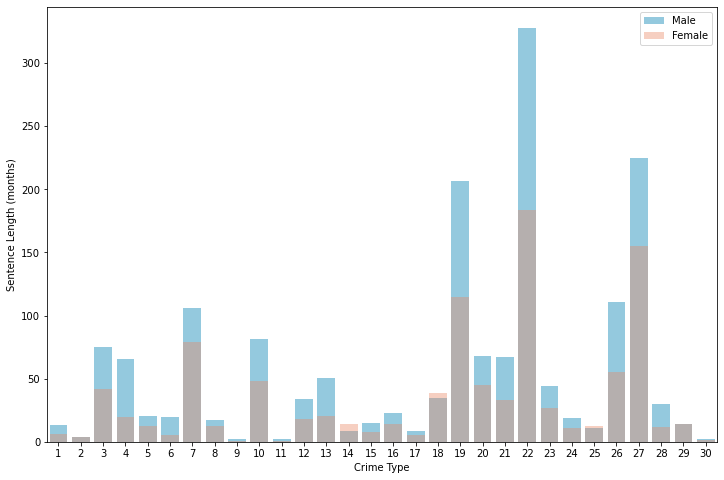

In [11]:
#referenced https://www.geeksforgeeks.org/how-to-overlap-two-barplots-in-seaborn/

# creating subplots
fig, ax = plt.subplots(1, 1, figsize=(12,8))

# plotting columns
ax = sns.barplot(x=df_male["crime_type"], y=df_male["sentence_length"], color='skyblue', ci=None)
ax = sns.barplot(x=df_female["crime_type"], y=df_female["sentence_length"], color='coral', alpha=0.4, ci=None)
 
# renaming the axes
ax.set(xlabel='Crime Type', ylabel='Sentence Length (months)') #, legend=['Male', 'Female'])
plt.legend(["Male", "Female"])
# visualizing illustration
plt.show()

### Sentence length by gender (side by side)

In [12]:
#referenced: https://www.python-graph-gallery.com/grouped-barplot

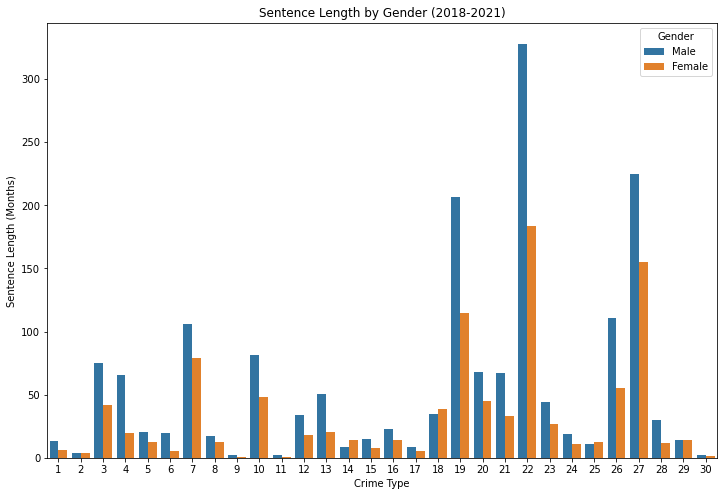

In [13]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df['crime_type'], y=df['sentence_length'], hue=df['gender'], ci=None)
plt.title('Sentence Length by Gender (2018-2021)')
plt.xlabel('Crime Type')
plt.ylabel('Sentence Length (Months)')
plt.legend(title='Gender', labels=['Male', 'Female']);

Men tend to have a longer sentencing length than women

In [14]:
crimes_selected = df[df['crime_type'].isin([3, 4, 10, 13, 14, 16, 18, 19, 20, 21, 22, 26, 27])]

In [15]:
crime_dict = {1:'Administration of Justice',2:'Antitrust',3:'Arson',4:'Assault',5:'Bribery/Corruption',6:'Burglary/Trespass',
              7:'Child Pornography',8:'Commercialized Vice',9:'Drug Possession',10:'Drug Trafficking',11:'Environmental',
              12:'Extortion/Racketeering',13:'Firearms',14:'Food and Drug',15:'Forgery/Counter/Copyright',16:'Fraud/Theft/Embezzlement',
              17:'Immigration',18:'Individual Rights',19:'Kidnapping',20:'Manslaughter',21:'Money Launder',22:'Murder',
              23:'National Defense',24:'Obscenity/Other Sex Offenses',25:'Prison Offenses',26:'Robbery',27:'Sex Abuse',
              28:'Stalking/Harassing',29:'Tax',30:'Other'}

crimes_selected['crime_type'] = [crime_dict.get(i) for i in crimes_selected['crime_type']]

In [16]:
crimes_selected['crime_type'].value_counts()

Drug Trafficking            66326
Firearms                    29148
Fraud/Theft/Embezzlement    20470
Robbery                      5590
Money Launder                4024
Sex Abuse                    3838
Assault                      2580
Murder                       1110
Kidnapping                    339
Individual Rights             254
Arson                         239
Manslaughter                  214
Food and Drug                 158
Name: crime_type, dtype: int64

Selected some crimes that were most frequent, had the highest sentences and included the crimes that women were sentenced higher than men

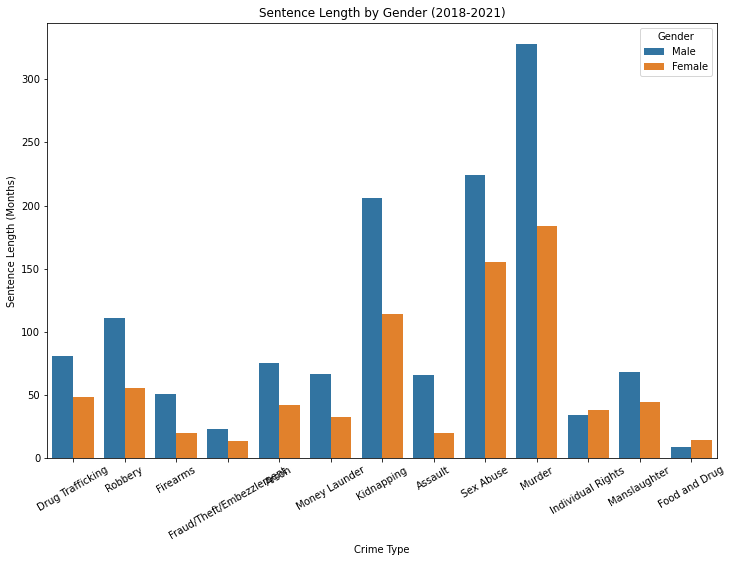

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x=crimes_selected['crime_type'], y=crimes_selected['sentence_length'], hue=crimes_selected['gender'], ci=None)
plt.title('Sentence Length by Gender (2018-2021)')
plt.xlabel('Crime Type')
plt.xticks(rotation=30)
plt.ylabel('Sentence Length (Months)')
plt.legend(title='Gender', labels=['Male', 'Female']);

In [ ]:
# Avg sentence length for male defendants
df[df['gender']==0]['sentence_length'].mean()

In [ ]:
# Avg sentence length for female defendants
df[df['gender']==1]['sentence_length'].mean()

### Deviation from guideline (gender)

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(x=df['crime_type'], y=df['guideline_var_pct'], hue=df['gender'], ci=None)
plt.title('Deviation from sentencing guidelines by gender')
plt.xlabel('Crime Type')
plt.ylabel('Upward deviation from guideline minimum(%)')
plt.legend(title='Gender', labels=['Male', 'Female']);

In [ ]:
df['gender'].value_counts()

In [ ]:
# Avg deviation for male defendants
df[df['gender']==0]['guideline_var_pct'].mean()

In [ ]:
# Avg deviation for female defendants
df[df['gender']==1]['guideline_var_pct'].mean()

In [ ]:
df[df['gender']==0]['count_convictons'].mean(), df[df['gender']==1]['count_convictons'].mean()  #similary number of counts

In [ ]:
df[df['gender']==0]['dependents'].mean(), df[df['gender']==1]['dependents'].mean() # a similar percentage of defendants have dependents

In [ ]:
df[df['gender']==0]['guideline_range'].value_counts(normalize=True), df[df['gender']==1]['guideline_range'].value_counts(normalize=True)

Women tend to receive lower sentences for similar crimes, but receive higher sentences relative to the guideline minimums.

## Black/White

### Sentence length by race (white/black)

In [ ]:
# creating separate dataframe with only black and white defendants
df_bw = df[(df['race'] == 1) | (df['race'] == 2)]

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_bw['crime_type'], y=df_bw['sentence_length'], hue=df_bw['race'], ci=None)
plt.title('Sentence Length by Race (2018-2021)')
plt.xlabel('Crime Type')
plt.ylabel('Sentence Length (Months)')
plt.legend(title='Race', labels=['White', 'Black']);

In [ ]:
# Avg sentence length for white defendants
df_bw[df_bw['race']==1]['sentence_length'].mean()

In [ ]:
# Avg sentence length for black defendants
df_bw[df_bw['race']==2]['sentence_length'].mean()

### Deviation from guideline (white/black)

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_bw['crime_type'], y=df_bw['guideline_var_pct'], hue=df_bw['race'], ci=None)
plt.title('Deviation from sentencing guidelines by race')
plt.xlabel('Crime Type')
plt.ylabel('Upward deviation from guideline minimum(%)')
plt.legend(title='Race', labels=['White', 'Black']);

In [ ]:
# Avg deviation from guideline min for white defendants
df_bw[df_bw['race']==1]['guideline_var_pct'].mean()

In [ ]:
# Avg deviation from guideline min for black defendants
df_bw[df_bw['race']==2]['guideline_var_pct'].mean()

## White/Non-white

### Sentence length by race (white/minority)

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df['crime_type'], y=df['sentence_length'], hue=df['white'], ci=None)
plt.title('Sentence Length by Race (2018-2021)')
plt.xlabel('Crime Type')
plt.ylabel('Sentence Length (Months)')
plt.legend(title='Race', labels=['Minority', 'White']);

### Deviation from guideline (white/minority)

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df['crime_type'], y=df['guideline_var_pct'] , hue=df['white'], ci=None)
plt.title('Sentence Length by Race (2018-2021)')
plt.xlabel('Crime Type')
plt.ylabel('Upward deviation from guideline minimum(%)')
plt.legend(title='Race', labels=['Minority', 'White']);

In [ ]:
df[df['white']==1]['guideline_var_pct'].mean()

In [ ]:
df[df['white']==0]['guideline_var_pct'].mean()

# Education

### Deviation from guideline (education)

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df['crime_type'], y=df['guideline_var_pct'], hue=df['college'], ci=None)
plt.title('Sentence Length by Race (2018-2021)')
plt.xlabel('Crime Type')
plt.ylabel('Upward deviation from guideline minimum(%)')
plt.legend(title='College Education', labels=['None', 'Some']);

In [ ]:
df[df['college']==1]['guideline_var_pct'].mean()

In [ ]:
df[df['college']==0]['guideline_var_pct'].mean()

In [ ]:
df['college'].value_counts()

In [ ]:
df[df['college']==1]['crime_type'].value_counts().head()

Top 5 charges for those with some college education: Drug Trafficking, Fraud/Theft/Embezzlement, Firearms, Immigration, Child Pornography

In [ ]:
df[df['college']==0]['crime_type'].value_counts().head()

Top 5 charges for those with no college education: Immigration, Drug Trafficking, Firearms, Fraud/Theft/Embezzlement, Robbery

## Violent Crimes

In [ ]:
violent_crimes = [22,27,20,19,4,26,3,12,26]
df_vc = df[df['crime_type'].isin(violent_crimes)]
df_bw_vc = df_bw[df_bw['crime_type'].isin(violent_crimes)]

#### Guideline Deviation

In [ ]:
# Guideline Deviation, Violent Crimes, White Defendants
df_vc[df_vc['race'] ==1]['guideline_var_pct'].mean()

In [ ]:
# Guideline Deviation, Violent Crimes, Black Defendants
df_vc[df_vc['race'] ==2]['guideline_var_pct'].mean()

In [ ]:
# Guideline Deviation, Violent Crimes, Minority Defendants
df_vc[df_vc['white'] ==0]['guideline_var_pct'].mean()

In [ ]:
# Guideline Deviation, Violent Crimes, Female Defendants
df_vc[df_vc['gender'] ==1]['guideline_var_pct'].mean()

In [ ]:
# Guideline Deviation, Violent Crimes, Male Defendants
df_vc[df_vc['gender'] ==0]['guideline_var_pct'].mean()

#### Sentence Length

In [ ]:
# Guideline Deviation, Violent Crimes, White Defendants
df_vc[df_vc['race'] ==1]['sentence_length'].mean()

In [ ]:
# Guideline Deviation, Violent Crimes, Black Defendants
df_vc[df_vc['race'] ==2]['sentence_length'].mean()

In [ ]:
# Guideline Deviation, Violent Crimes, Minority Defendants
df_vc[df_vc['white'] ==0]['sentence_length'].mean()

In [ ]:
# Guideline Deviation, Violent Crimes, Female Defendants
df_vc[df_vc['gender'] ==1]['sentence_length'].mean()

In [ ]:
# Guideline Deviation, Violent Crimes, Male Defendants
df_vc[df_vc['gender'] ==0]['sentence_length'].mean()

In [ ]:
# Number of violent crime convictions by race
df_vc['race'].value_counts()

## By Region

region_dict = {'Connecticut':'Northeast', 'Maine':'Northeast', 'Massachusetts':'Northeast',\
'New Hampshire':'Northeast', 'Rhode Island':'Northeast', 'Vermont':'Northeast',\
'Delaware':'South', 'Maryland':'South', 'New Jersey':'Northeast',\
'New York':'Northeast', 'Pennsylvania':'Northeast','District of Columbia':'South',\
'Alabama':'South', 'Arkansas':'South', 'Florida':'South', 'Georgia':'South', 'Kentucky':'South',\
'Louisiana':'South', 'Mississippi':'South', 'Missouri':'South',\
'North Carolina':'South', 'South Carolina':'South', 'Tennessee':'South',\
'Virginia':'South', 'West Virginia':'South',\
'Illinois':'Midwest', 'Indiana':'Midwest', 'Iowa':'Midwest', 'Kansas':'Midwest',\
'Michigan':'Midwest', 'Minnesota':'Midwest', 'Nebraska':'Midwest',\
'North Dakota':'Midwest', 'Ohio':'Midwest', 'South Dakota':'Midwest', 'Wisconsin':'Midwest',\
'Arizona':'West', 'New Mexico':'West', 'Oklahoma':'South', 'Texas':'South',\
'Alaska':'West', 'California':'West', 'Colorado':'West', 'Hawaii':'West',\
'Idaho':'West', 'Montana':'West', 'Nevada':'West', 'Oregon':'West', 'Utah':'West',\
'Washington':'West', 'Wyoming':'West'}

In [ ]:
df['region'].value_counts()

In [ ]:
# creating databases for immigration and for all other offenses
df_imm = df[df['crime_type'] == 17]
df_non_imm = df[df['crime_type'] != 17]

In [ ]:
# Percentage of total convictions that are for immigration, by region
df_imm['region'].value_counts() / df['region'].value_counts()

In [ ]:
df.groupby('state')['crime_type'].value_counts()  #df['crime_type']).value_counts()

In [ ]:
df18to21_cleanedH.groupby('year_sentenced')['age'].count()

#### Analysis of non-immigration convictions (by region)

In [ ]:
sns.histplot(df_non_imm['region'])

In [ ]:
df_non_imm.columns

In [ ]:
df_non_imm[df_nom_imm['race']==1].groupby('region')['guideline_var_pct'].mean()

In [ ]:
# Sentence length for white defendants by region
df_non_imm[df_non_imm['race']==1].groupby('region')['sentence_length'].mean()

In [ ]:
# Sentence length for black defendants by region
df_non_imm[df_non_imm['race']==2].groupby('region')['sentence_length'].mean()

In [ ]:
# Sentence length for minorities by region
df_non_imm[df_non_imm['white']==0].groupby('region')['sentence_length'].mean()

In [ ]:
# Guideline variance for white defendants by region
df_non_imm[df_non_imm['race']==1].groupby('region')['guideline_var_pct'].mean()

In [ ]:
# Guideline variance for black defendants by region
df_non_imm[df_non_imm['race']==2].groupby('region')['guideline_var_pct'].mean()

In [ ]:
# Guideline variance for minority defendant by region
df_non_imm[df_non_imm['white']==0].groupby('region')['guideline_var_pct'].mean()

In [ ]:
# percentage of convictions where defendant is white(non-immigration charges)
df_non_imm.groupby('region')['white'].mean()

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df['crime_type'], y=df['convicti'], hue=df['region'], ci=None)
plt.title('Sentence Length by Race (2018-2021)')
plt.xlabel('Crime Type')
plt.ylabel('Sentence Length (Months)')
plt.legend(title='Race', labels=['White', 'Black']);